In [16]:
from duckduckgo_search import ddg_images
from fastcore.all import *
def search_images(term,max_images=30):
    print("Searching for ",term)
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [18]:
urls=search_images('footballers',max_images=1)
urls[0]

Searching for  footballers


'http://static.goal.com/434300/434331.jpg'

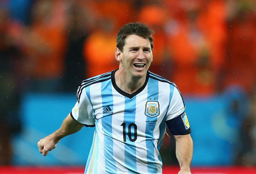

In [25]:
from fastdownload import download_url
dest='footballer.jpg'
download_url(urls[0],dest,show_progress=False)

from fastai.vision.all import *
im=Image.open(dest)
im.to_thumb(256,256)

Searching for  cricketer photos


C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
C:\Users\Kesha\conda3\Lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


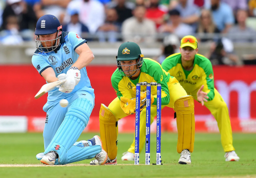

In [26]:
download_url(search_images('cricketer photos',max_images=1)[0],'cricketer.jpg',show_progress=False)
Image.open('cricketer.jpg').to_thumb(256,256)

In [28]:
searches='cricketer','footballer'
path=Path('footballer_or_not')
from time import sleep

for o in searches:
    dest=path/o
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f'{o} photos'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} club photo'))
    sleep(10)
    download_images(dest,urls=search_images(f'{o} country photo'))
    sleep(10)
    resize_images(path/o,max_size=400,dest=path/o)

Searching for  cricketer photos
Searching for  cricketer club photo
Searching for  cricketer country photo
Searching for  footballer photos
Searching for  footballer club photo
Searching for  footballer country photo


In [29]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

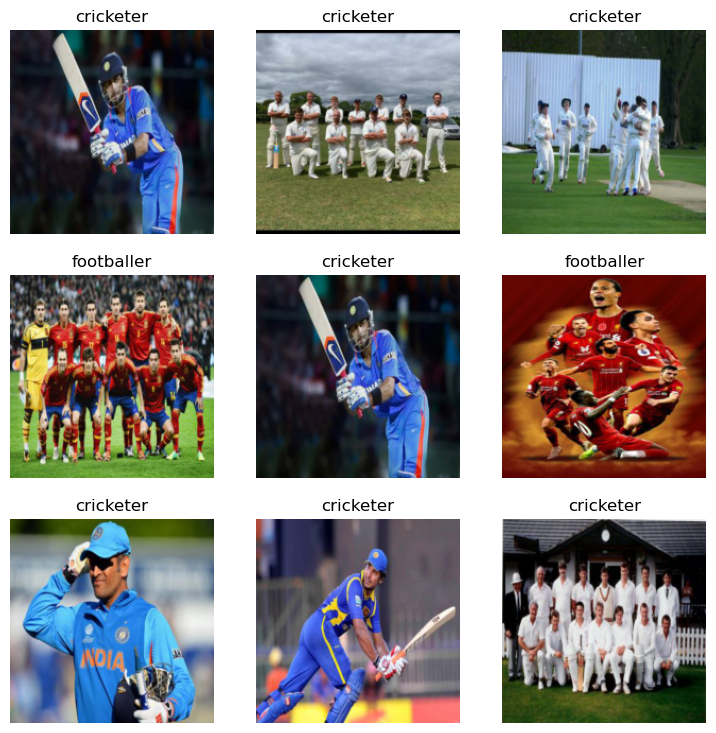

In [31]:
dls=DataBlock(
blocks=(ImageBlock,CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2,seed=42),
get_y=parent_label,
item_tfms=[Resize(192,method='squish')]
).dataloaders(path,bs=32)

dls.show_batch(max_n=9)

In [32]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)


C:\Users\Kesha\conda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kesha\conda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Kesha/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:03<00:00, 14.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.145709,0.261153,0.146341,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.541715,0.133096,0.048780,00:29
1,0.420630,0.087524,0.024390,00:29
2,0.311941,0.081764,0.024390,00:28


In [34]:
is_cricketer,_,probs=learn.predict(PILImage.create('footballer.jpg'))
print("This is a :",is_cricketer)
print(f"Probability it's a cricketer :{probs[0]:0.4f}")


This is a : footballer
Probability it's a cricketer :0.0000


Here what each of the DataBlock parameters means:

blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

get_items=get_image_files, 

To find all the inputs to our model, run the get_image_files function (which returns a list of all image files in a path).

splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

get_y=parent_label,

The labels (y values) is the name of the parent of each file (i.e. the name of the folder they're in, which will be bird or forest).

item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).